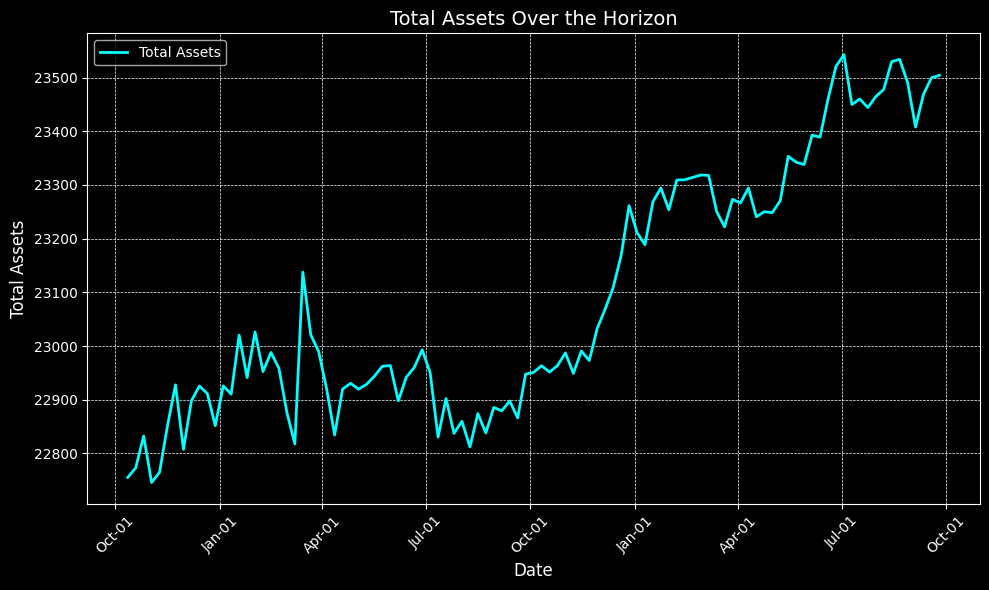

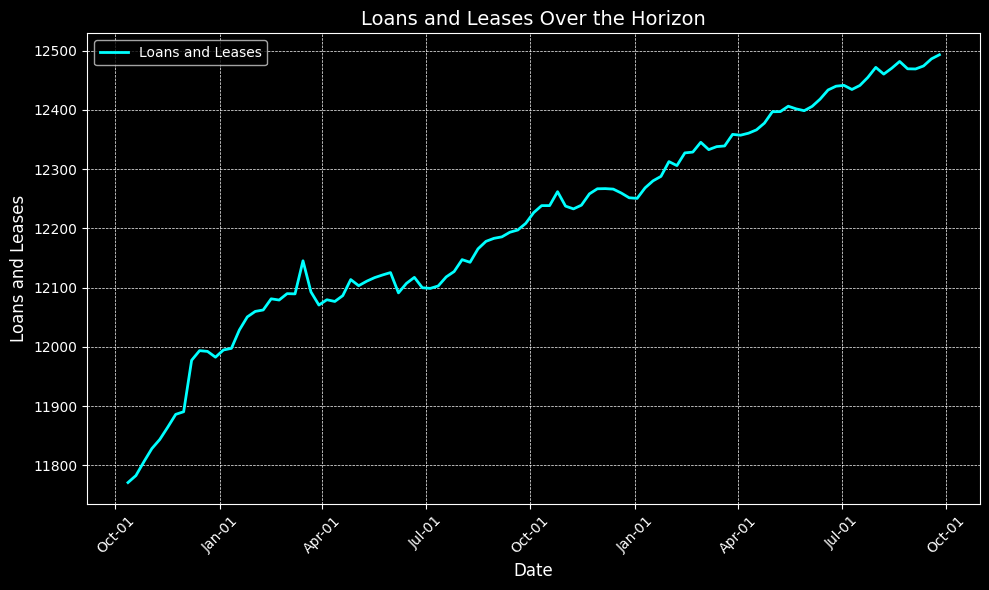

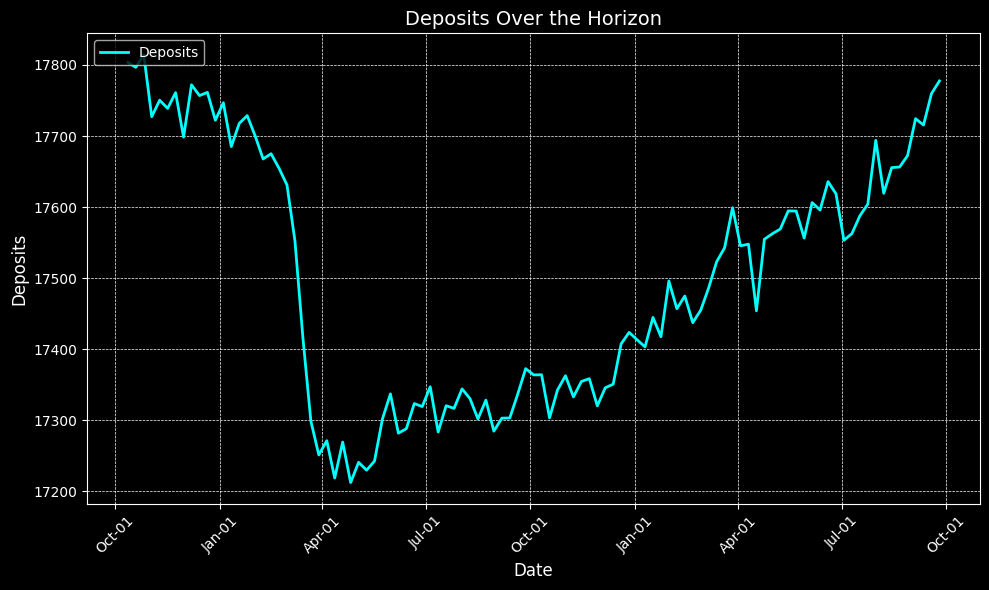

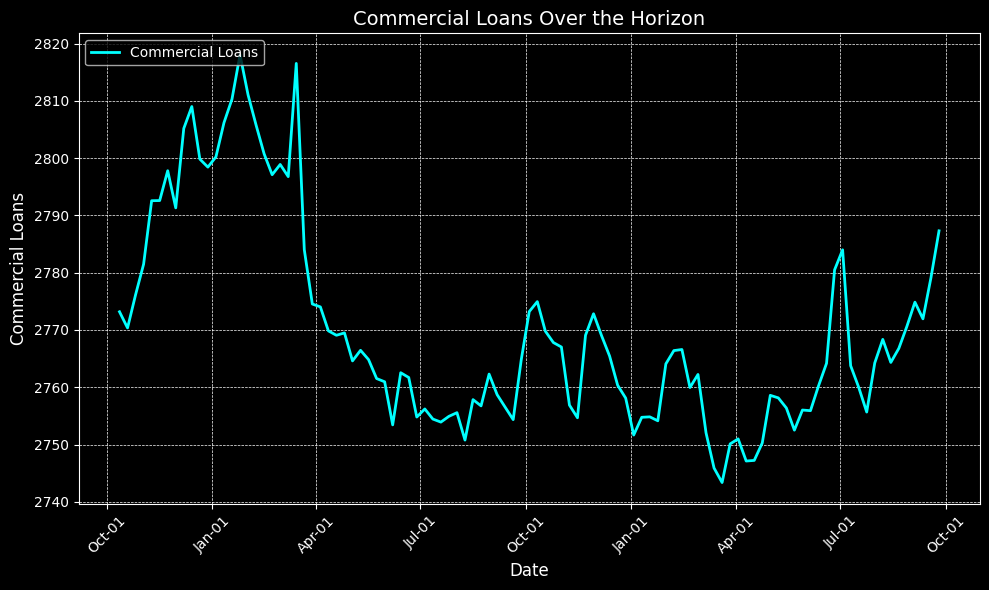

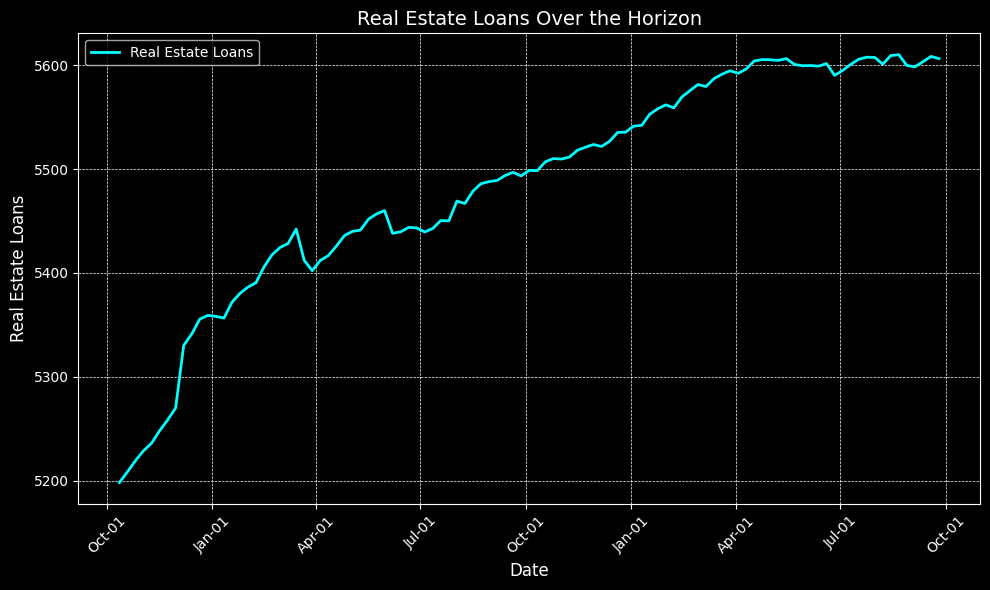

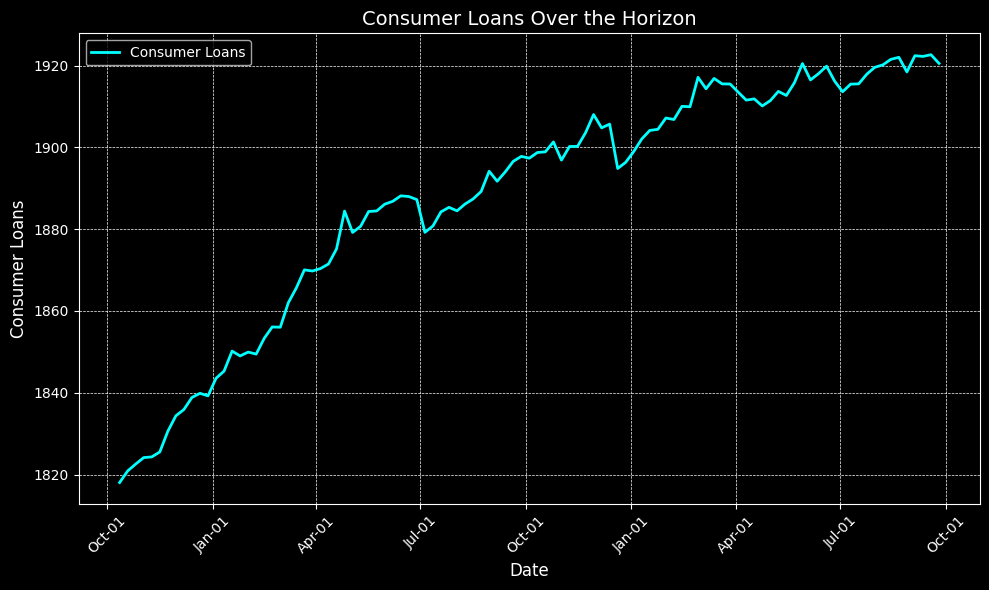

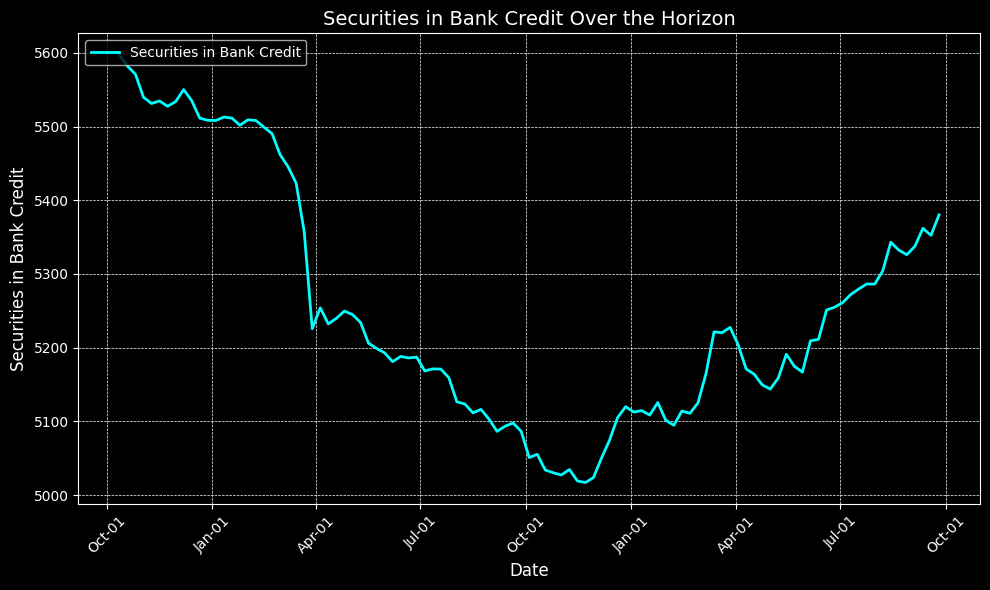

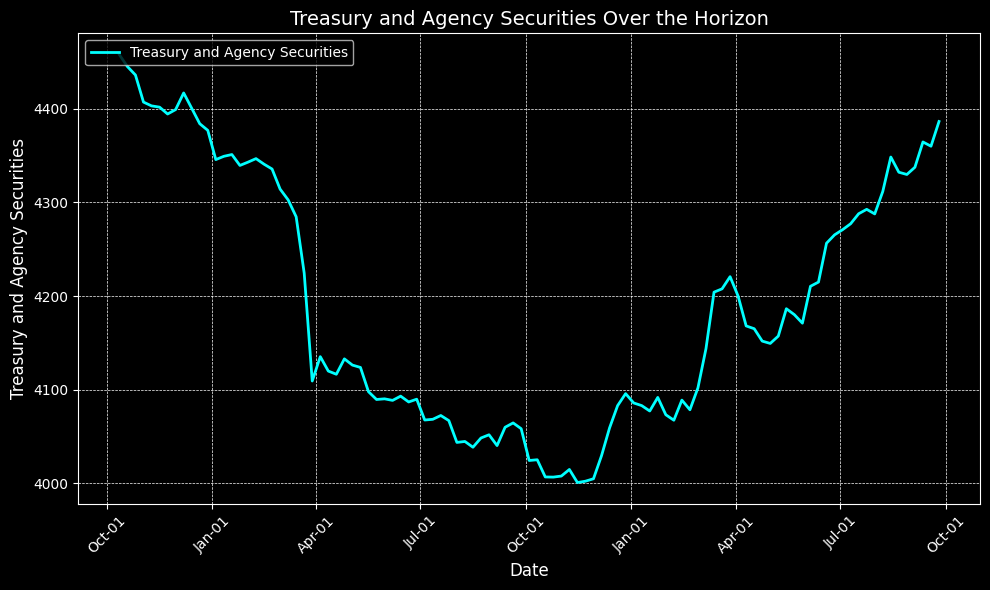

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from matplotlib.dates import DateFormatter

# Initialize FRED API with your API key
# Replace 'your_fred_api_key' with your actual API key
X=24
fred = Fred(api_key='Enter Your Key')

# Define the series IDs for H8 data, including the new metrics
series_ids = {
    'Total Assets': 'TLAACBW027SBOG',
    'Loans and Leases': 'TOTLL',
    'Deposits': 'DPSACBW027SBOG',
    'Commercial Loans': 'TOTCI',
    'Real Estate Loans': 'RELACBW027SBOG',
    'Consumer Loans': 'CLSACBW027SBOG',
    'Securities in Bank Credit': 'SBCACBW027SBOG',
    'Treasury and Agency Securities': 'TASACBW027SBOG'
}

# Fetch the data for the past 3 months
three_months_ago = pd.Timestamp.today() - pd.DateOffset(months=X)
data = pd.DataFrame()

for label, series_id in series_ids.items():
    series_data = fred.get_series(series_id, observation_start=three_months_ago)
    data[label] = series_data

# Format index as DateTime
data.index = pd.to_datetime(data.index)

# Plotting the data with a black background for better visibility
plt.style.use('dark_background')

for column in data.columns:
    plt.figure(figsize=(10, 6))
    
    plt.plot(data.index, data[column], label=column, color='cyan', linewidth=2)
    
    # Formatting the plot
    plt.title(f'{column} Over the Horizon', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45)
    
    # Set date format on x-axis
    date_form = DateFormatter("%b-%d")
    plt.gca().xaxis.set_major_formatter(date_form)
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Show legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [12]:
data_h8=data

ADF Statistic: -2.535255768479576
p-value: 0.10713012848331993


C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)


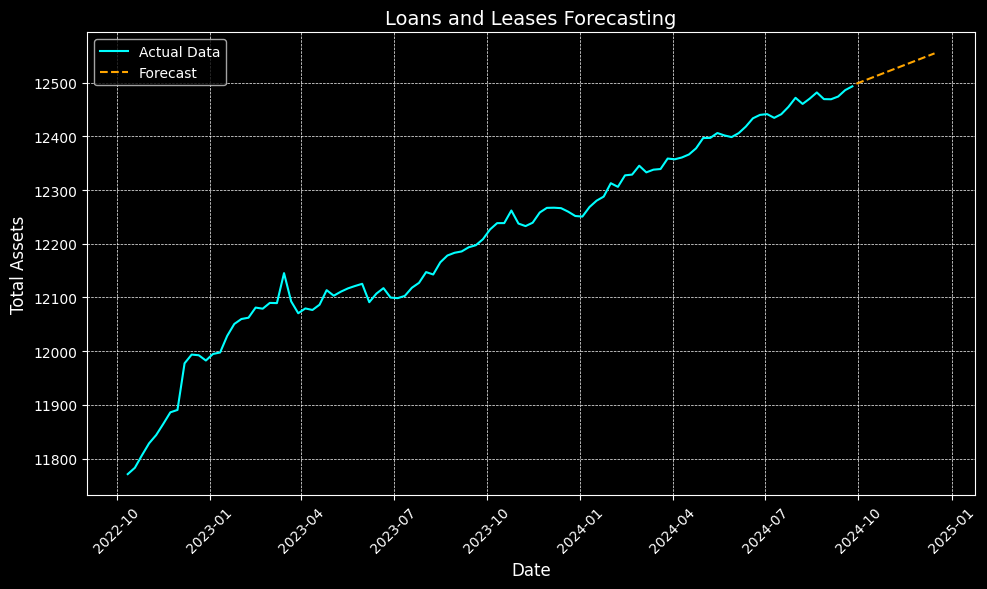

RMSE: 12462.08000467136


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np

# Select the series you want to forecast (Total Assets in this case)
series = data_h8['Loans and Leases']

# Step 1: Check for stationarity with the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1]  # If p-value < 0.05, series is stationary

# Check stationarity and difference if needed
p_value = adf_test(series)
if p_value > 0.05:
    # Series is not stationary, apply differencing
    series_diff = series.diff().dropna()
else:
    series_diff = series

# Step 2: Fit the ARIMA model
model = ARIMA(series_diff, order=(1,1,1))  # You can adjust the (p,d,q) parameters for tuning
model_fit = model.fit()

# Step 3: Forecast the next steps
forecast_steps = 12  # Forecast for the next 12 periods (weeks in this case)
forecast = model_fit.forecast(steps=forecast_steps)

# Step 4: Visualize the actual vs forecasted data
plt.style.use('dark_background')

plt.figure(figsize=(10,6))
plt.plot(series.index, series, label='Actual Data', color='cyan')
plt.plot(pd.date_range(series.index[-1], periods=forecast_steps, freq='W'), forecast.cumsum() + series.iloc[-1], label='Forecast', color='orange', linestyle='--')

plt.title('Loans and Leases Forecasting', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Assets', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Step 5: Evaluate the forecast using RMSE
rmse = np.sqrt(mean_squared_error(series[-forecast_steps:], forecast))
print(f'RMSE: {rmse}')
